# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [64]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [65]:
# Read in data from source 

df_raw = pd.read_csv("/Users/jeffreyrutledge/GA-datascience/projects/unit-projects/project-2/assets/admissions.csv")

# We will print both the "head" of the data table (first 5 records; .head() command) and the "tail" of the table (last 5 records; .tail() command).

print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [66]:
print(df_raw.tail())

     admit    gre   gpa  prestige
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0


## Questions
#### Question 1. How many observations are in our dataset? 



In [67]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations (index 0 - 399).  However, it appears not all records contain values for each variable.  Specificaly, gre and gpa are both missing 2 entries; and prestige is missing 1 entry. 

#### Question 2. Create a summary table

In [68]:
# We use the .describe() command to show us summary statistics for our admissions data.

In [69]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: STD, or standard deviation, is a statistical measure used to quantify the amount of variation or dispersion exhibited by a set data.  A larger (smaller) standard deviation indicates that the data points tend to be spread out farther (closer) to the mean value of the data set.

gre has a larger standard deviation as compared with gpa because gre's data range is far larger and its data points are more spread out from its mean value as compared with gpa.  (gre: max = 800.0, min = 588.04, range = 211.96; gpa: max = 4.0, min = 2.26, range = 1.74).

#### Question 4. Drop data points with missing data


In [70]:
# We drop data points (full rows, or records) by using the command .dropna(inplace=True).

df_raw.dropna(inplace=True)

In [74]:
df_raw.admit.value_counts()

0    271
1    126
Name: admit, dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: We confirm that we dropped the correct rows (rows with missing data) by re-running the .count() command.  (See below.)  Notice all variables now contain an equal number of observations, 397, whereas the initial data set showed both gre and gpa with 398 observations and prestige with 399.  The resulting data table now shows 397 observations for every variable in every observation or data point - this confirms we dropped all records with missing data elements.

In [75]:
df_raw.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1c152d1d68>],
 'caps': [<matplotlib.lines.Line2D at 0x1c152d97b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c15341470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c15341048>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c152d1eb8>,
  <matplotlib.lines.Line2D at 0x1c152d9390>]}

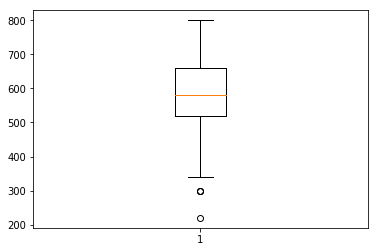

In [76]:
# The "gre" box plot is shown below.

plt.boxplot(df_raw['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x1c153f1cc0>],
 'caps': [<matplotlib.lines.Line2D at 0x1c153f9710>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c154023c8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c153f9f60>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1c153f1e10>,
  <matplotlib.lines.Line2D at 0x1c153f92e8>]}

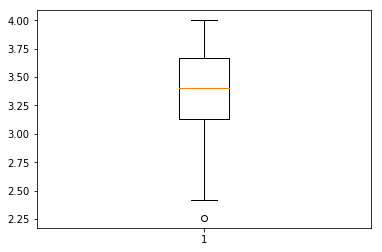

In [77]:
#the "gpa" box plot is shown below.

plt.boxplot(df_raw['gpa'])

#### Question 7. What do this plots show?

Answer: Box plots for gre and gpa both appear skewed toward lower values within the variables' ranges (i.e., distributions for both gre and gpa appear "skewed left").  

The gre box plot almost appears symmetrical about the mean (i.e., close to a "normal distribution").  However, the existence of two outliers (values of ~225 and 300) renders such a conclusion inaccurate.

The gpa box plot also suggests a distribution that is "skewed left" and, therefore, not a "normal distribution".  As compared with the gre box plot, gpa shows only a single left-tail outlier, suggesting a more convincing left-skew.

#### Question 8. Describe each distribution 

(array([ 1.,  3., 16., 28., 50., 75., 81., 64., 44., 35.]),
 array([220., 278., 336., 394., 452., 510., 568., 626., 684., 742., 800.]),
 <a list of 10 Patch objects>)

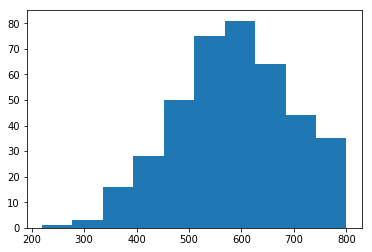

In [78]:
# The 'gre' distribution is plotted as a histogram and is shown below.

plt.hist(df_raw['gre'])

# the gre histogram distribution, similar to the gre box plot, suggests a left skewed distribution.

(array([ 3.,  4., 16., 32., 42., 57., 76., 65., 39., 63.]),
 array([2.26 , 2.434, 2.608, 2.782, 2.956, 3.13 , 3.304, 3.478, 3.652,
        3.826, 4.   ]),
 <a list of 10 Patch objects>)

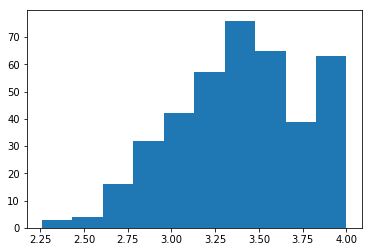

In [79]:
# The "gpa" distribution is plotted as a histogram and is shown below.

plt.hist(df_raw['gpa'])

# The gpa histogram also shows a left-skewed distribution.

(array([ 61.,   0.,   0., 148.,   0.,   0., 121.,   0.,   0.,  67.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

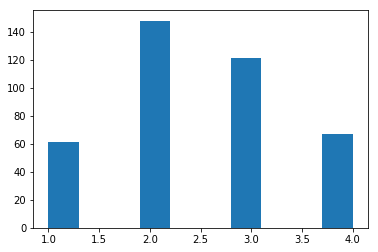

In [80]:
# The "prestige" distribution is plotted as a historam and shown below.

plt.hist(df_raw['prestige'])

# The "prestige" distribution also appears skewed - in this case, "skewed right".  If "prestige" included 
# ~10-12 more 3.0 value and 10-12 fewer 4.0 values, we would conclude the distribution approximates a 
# "normal distribution".

In [81]:
# Following our skewness discussions, above, we investigate each distribution further and conclude definitively 
# that each variable's distribution is, in fact, skewed.  (See .skew() command and output below => gre: skewed left; 
# gpa: skewed left; prestige: slightly skewed right.)

df_raw.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [82]:
df_raw.admit.value_counts()

0    271
1    126
Name: admit, dtype: int64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. Each variable's distribution is skewed and, therefore, the overall model violates the "normal distribution" assumption.  In order to create a predictive model from te existing data set, we must "transform" the skewed distributions into normal distributions.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, we need to "correct" the skewed distributions by converting them into "normal distributions" in order that we meet our assumption of a normal distribution.  We convert the skewed distributions into normal distributions via execution of a "log transformation" using the np.log() command.

Note: after executing np.log() commands for each independent variable and plotting histograms for each (see following 3 plots), I found the distributions to be even more skewed.  (Did I make a mistake?)

In [87]:
df_raw_log = np.log(df_raw[['gre', 'gpa', 'prestige']])

In [95]:
df_raw_log.head()

,gre,gpa,prestige
0,5.940171,1.283708,1.098612
1,6.492240,1.300192,1.098612
2,6.684612,1.386294,0.000000
3,6.461468,1.160021,1.386294
4,6.253829,1.075002,1.386294


(array([  1.,   0.,   3.,   8.,  19.,  30.,  88.,  75., 116.,  57.]),
 array([5.39362755, 5.52272596, 5.65182438, 5.7809228 , 5.91002122,
        6.03911964, 6.16821806, 6.29731647, 6.42641489, 6.55551331,
        6.68461173]),
 <a list of 10 Patch objects>)

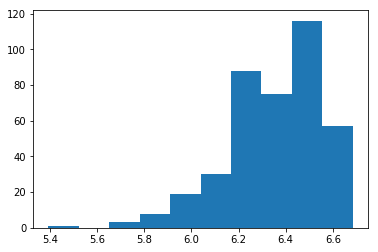

In [101]:
plt.hist(df_raw_log['gre'])

(array([ 1.,  4.,  9., 17., 38., 52., 69., 69., 65., 73.]),
 array([0.81536481, 0.87245777, 0.92955072, 0.98664368, 1.04373663,
        1.10082959, 1.15792254, 1.2150155 , 1.27210845, 1.32920141,
        1.38629436]),
 <a list of 10 Patch objects>)

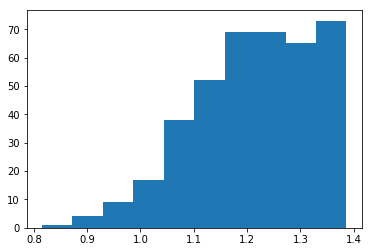

In [102]:
plt.hist(df_raw_log['gpa'])

(array([ 61.,   0.,   0.,   0.,   0., 148.,   0., 121.,   0.,  67.]),
 array([0.        , 0.13862944, 0.27725887, 0.41588831, 0.55451774,
        0.69314718, 0.83177662, 0.97040605, 1.10903549, 1.24766493,
        1.38629436]),
 <a list of 10 Patch objects>)

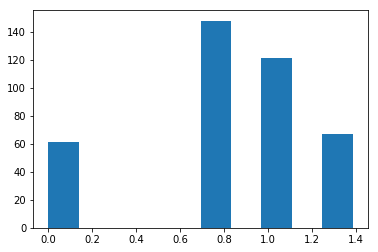

In [105]:
plt.hist(df_raw_log['prestige'])

#### Question 11. Which of our variables are potentially colinear? 

In [96]:
# We will also examine whether our independent variables exhibit collinearity/multicollinearity.  
# Running the .corr() command will create a correlation matrix to aid this eaxmination.

df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [97]:
# We will also look at the scatter plot.

from pandas.plotting import scatter_matrix

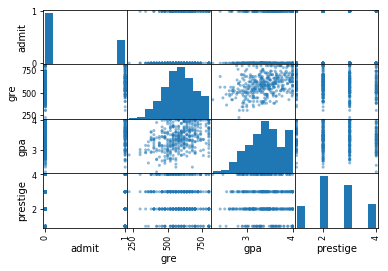

In [100]:
scatter_matrix(df_raw);

Based on the correlation matrix and the scatter matrix, it does NOT appear that any meaningful collinearity exists between the independent variables.

#### Question 12. What did you find?

Answer: My overall findings include the following: 1) distributions for each independent variable are skewed and will require log transformation in order that thay each satisfy the normal distribution assumption prior to creating our reqgression model. 2) multicollinearity does not exist to any meaningful degree.  Perhaps the relationship between gre and gpa (0.3824) might draw attention; however, the degree of strength remains relatively low.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: After ensuring the skewed distribution of "prestige" is transformed and meets the assumption of a normal distribution, we create a linear regression model based on our 397 observations of admission rates.
Once our model is created, we examine the statistical properties to ensure the independent variable (prestige) accounts for a meaningfully strong degree of of greduate school admission rates (i.e., R^2 is high => 90%+?).  If the R^2 is not meaningful, we would therefore conclude that that prestige does not adequately explain or predict graduate school admission rates.

#### Question 14. What is your hypothesis? 

Answer: Hypothesis: the prestige of students' undergraduate college is positively correlated with graduate school acceptance rates and is therefore a good predictor of being accepted to grad school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data